## Transport durch Konvektion

### 1D-Konvektion

Um genauer zu verstehen, was die verschiedenen Teile der Navier-Stokes-Gleichung bewirken, betrachten wir zunächst nur den Transport durch Konvektion und lassen die Diffusions- und Quellterme weg. Außerdem reduzieren wir alles nochmal um eine Dimension und kümmern uns nur um 1-dimensionalen konvektiven Transport. Von der Impulsgleichung bleibt dann nur noch:

$$\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x} = 0 $$

#### Lineare 1D-Konvektion

Was bleibt ist eine partielle, nicht lineare Differentialgleichung. Um alles für den Einstieg noch einfacher zu machen, betrachten wir zunächst nur die lineare Variante davon:

$$\frac{\partial u}{\partial t}+c\frac{\partial u}{\partial x} = 0 $$

Diese Gleichung beschreibt die Ausbreitung einer anfänglich vorgegebenen Geschwindigkeitsverteilung, die wir als Welle verstehen können, mit der Geschwindigkeit $c$.

Wir diskretisieren die Gleichung in der Zeit mithilfe eines einseitigen (Vorwärts-) differenzenquotienten und im Raum mit einem Rückwärtsdifferenzenquotienten. Die Raumkoordinate $x$ diskretisieren wir mit äquidistanten Punkten, die wir mit dem Index $i = 0 \dots N$ nummerieren. In der Zeit schreiten wir mit der Schrittweite $\Delta t$ voran.

$$\frac{\partial u}{\partial t} = \frac{u_i^{n+1} - u_i^n}{\Delta t}$$

$$\frac{\partial u}{\partial x} = \frac{u_i^n - u_{i-1}^n}{\Delta x}$$

zusammen wird die lineare Konvektionsgleichung in diskreter Schreibweise dann zu:

$$\frac{u_i^{n+1} - u_i^n}{\Delta t} + c \frac{u_i^n - u_{i-1}^n}{\Delta x} = 0 $$

Vorausgesetzt, wir haben eine Anfangsbedingung für die Geschwindigkeitsverteilung (für $n=0$), kann die Geschwindigkeitsverteilung zum jeweils nächsten Zeitschritt ($n+1$) berechnet werden. Wir müssen nur die Gleichung danach umstellen:

$$u_i^{n+1} = u_i^n - c\frac{\Delta t}{\Delta x}\left(u_i^n - u_{i-1}^n \right)$$

Alles was wir jetzt noch tun müssen, ist die Gleichung in Python umzusetzen und zu erforschen, was passiert.

Wie schon zuvor binden wir wieder die wichtigsten Bibliotheken ein und konfigurieren die Matplotlib so, dass die Diagramme im Notebook vernünftig angezeigt werden:

In [77]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

Als nächstes benötigen wir einige Variablen, um die diskretisierten Punkte im Raum und die Zeitschritte zu beschreiben:

In [78]:
L  = 2.0        # Länge unseres Rechengebiets
nx = 41         # Anzahl der diskreten Punkte
dx = L / (nx-1) # Abstand zwischen den Punkten
t_end = 0.6     # Endzeitpunkt für die Berechnung
dt = 0.025      # Zeitschrittweite
c  = 1.0        # Geschwindigkeit der Welle

Und wir müssen die Anfangsbedingungen festlegen. Wir wählen eine Rechteckfunktion, mit $u=2$ im Intervall $0.5 <= x <= 1$ und $u=1$ im restlichen Gebiet:

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]


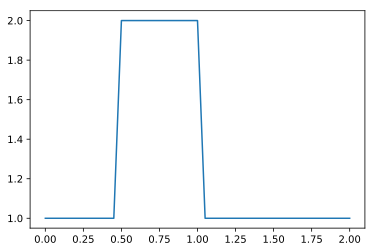

In [79]:
u_init = np.ones(nx)                   # ganzes Gebiet mit 1 belegen
u_init[int(0.5/dx):int(1/dx+1)] = 2.0  # u=2 zwischen 0.5 und 1
print (u_init)

xi = np.linspace(0,2,nx)          # x-Koordinaten der diskreten Punkte
plt.plot(xi, u_init);

Jetzt müssen wir nur noch die diskrete Gleichung von oben implementieren. Da wir nicht alle Zeitschritte zwischenspeichern wollen, genügt es, wenn wir uns die Geschwindigkeitsverteilung zum alten (`u_alt`) und neuen (`u_neu`) Zeitpunkt merken:

In [89]:
u_alt = u_init.copy()  # wir übernehmen zunächst einmal die Anfangsbedingung
u_neu = u_alt.copy()
t = 0                  # der Anfangszeitpunkt ist 0

while t < t_end:      # Schleife, solange bis Endzeitpunkt erreicht ist
    for i in range(1, nx):  # Schleife über die diskreten Punkte (außer i=0)
        u_neu[i] = u_alt[i] - c * dt / dx * (u_alt[i] - u_alt[i-1])
    u_alt = u_neu.copy()
    t += dt

Fertig! Schon können wir uns anschauen, wie die Welle innerhalb der vorgegebenen 0.6 s fortbewegt wurde:

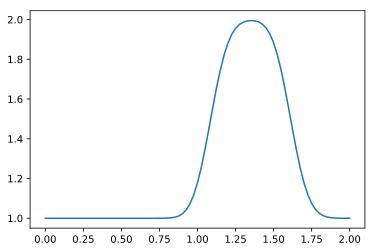

In [90]:
plt.plot(xi, u_neu);

Die Welle hat sich tatsächlich nach rechts bewegt. Aber sie sieht jetzt anders aus. Wieso? Das Phänomen hat mit der Diskretisierung zu tun, durch die wir eine nicht gewollte "numerische Diffusion" bekommen. Um diese zu verkleinern, müssen wir die räumliche Diskretisierung mit einer höheren Auflösung versehen.

Aufgaben:
- Finden Sie raus, wie die Geschwindigkeit an der Stelle $x=$ berechnet wird. Was folgern Sie daraus? Welche Randbedingungen wurden für das Problem verwendet?

- Experimentieren Sie mit der Anzahl der Gitterpunkte und der Zeitschrittweite. Was ändert sich.

- Implementieren Sie ein Zentraldifferenzenverfahren für die Diskretisierung im Raum.

#### Nichtlineare 1D-Konvektion

Wir verwenden jetzt die 1D-Konvektionsgleichung von oben, ohne die zuvor durchgeführte Linearisierung (Ersatz von $u$ durch $c$):

$$\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x} = 0 $$

Die kleine Änderung in der Gleichung hat es in sich. Anders als zuvor sind jetzt plötzlich unstetige Lösungen möglich (z.B. Stöße bei Überschallströmungen). Auch  ist die Nichtlinearität Verantwortlich für die Entstehung von Turbulenz.

Die Diskretisierung funktioniert analog zum vorhergehenden Fall. Wieder verwenden wir nur einseitige Differenzenquotienten:

$$u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x}\left(u_i^n - u_{i-1}^n \right)$$

In Python ändert sich ebenfalls nicht viel:

In [91]:
L  = 2.0        # Länge unseres Rechengebiets
nx = 81         # Anzahl der diskreten Punkte
dx = L / (nx-1) # Abstand zwischen den Punkten
t_end = 0.6     # Endzeitpunkt für die Berechnung
dt = 0.01       # Zeitschrittweite

u_init = np.ones(nx)                   # ganzes Gebiet mit 1 belegen
u_init[int(0.5/dx):int(1/dx+1)] = 2.0  # u=2 zwischen 0.5 und 1

xi = np.linspace(0,2,nx)          # x-Koordinaten der diskreten Punkte

In [109]:
u_alt = u_init.copy()  # wir übernehmen zunächst einmal die Anfangsbedingung
u_neu = u_alt.copy()
t = 0                  # der Anfangszeitpunkt ist 0

while t < t_end:      # Schleife, solange bis Endzeitpunkt erreicht ist
    for i in range(1, nx):  # Schleife über die diskreten Punkte (außer i=0)
        u_neu[i] = u_alt[i] - u_alt[i] * dt / dx * (u_alt[i] - u_alt[i-1])
    u_alt = u_neu.copy()
    t += dt

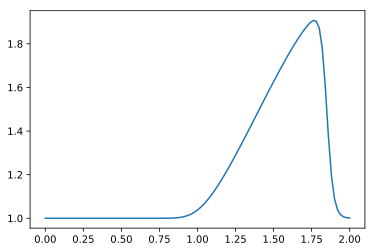

In [110]:
plt.plot(xi, u_neu);

#### Die Courant-Friedrichs-Lewy Zahl

Wenn wir im Beispiel oben die Anzahl der Gitterpunkte stark erhöhen und die Zeitschrittweite gleich lassen, dann wird die Lösung instabil. Eine physikalische Interpretation ist, dass die Distanz, die eine Welle während eines Zeitschritts zurücklegt größer ist, als der Abstand zwischen zwei Gitterpunkten. Die Information über die Geschwindigkeit wird dann nicht mehr richtig durch das Strömungsgebiet transportiert und die Lösung divergiert.

Der Zeitschritt muss also immer an die Gitterauflösung angepasst werden. Ein Maß dafür ist die sog. [Courant-Friedrichs-Lewy](https://de.wikipedia.org/wiki/CFL-Zahl)-, CFL- oder einfach Courant-Zahl, welche die zurückgelegte Distanz pro Zeitschritt durch die Gitterweite teilt:

$$CFL = \frac{u\Delta t}{\Delta x} <= CFL_{max}$$

Die maximal erlaubte CFL-Zahl hängt vom Diskretisierungsverfahren ab.

Aufgabe: Prüfen Sie, wie groß die CFL-Zahl in unserem Fall maximal werden darf.

#### Optimierung des Python-Codes

Bevor wir uns die nichtlineare Konvektion in 2D anschauen, müssen wir uns noch ein paar Gedanken zur Ausführungsgeschwindigkeit des Python-Codes machen. In Python sind `for`- und `while`-Schleifen sehr langsam im Vergleich zu anderen Programmiersprachen.

Mehrere Wege führen aus dem Dilemma, von denen wir zwei besprechen wollen:

1. Verwendung von Numpy wo immer möglich

2. Verwendung eines "Just-In-Time"-Compilers, der den Code in Maschinensprache übersetzt (z.B. Numba, vgl. Molekulardynamiksimulation).

Hier verwenden wir nur die erste Variante, mit der wir die innere Schleife eliminieren. Der Code ist etwa 100 - 1000 mal schneller als die Variante mit der Schleife.

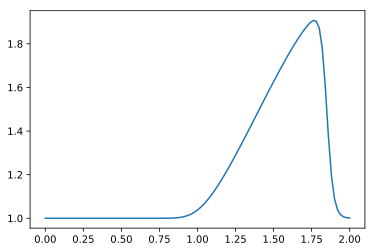

In [111]:
u_alt = u_init.copy()  # wir übernehmen zunächst einmal die Anfangsbedingung
u_neu = u_alt.copy()
t = 0                  # der Anfangszeitpunkt ist 0

while t < t_end:      # Schleife, solange bis Endzeitpunkt erreicht ist
    # die innere Schleife sparen wir uns, in dem wir ganze Teile der Arrays
    # addieren und subtrahieren
    u_neu[1:] = u_alt[1:] - u_alt[1:] * dt / dx * (u_alt[1:] - u_alt[0:-1])
    u_alt = u_neu.copy()
    t += dt   
plt.plot(xi, u_neu);

### 2D-Konvektion

Jetzt übertragen wir die Vorgehensweise aus dem 1-D-Fall auf den 2-D-Fall. Die zwei gekoppelten Differentialgleichungen dafür sind:

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = 0$$

$$\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = 0$$

Wir diskretisieren diese wieder mit einseitigen Differenzenquotienten und erhalten:

$$\frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{u_{i,j}^n-u_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{u_{i,j}^n-u_{i,j-1}^n}{\Delta y} = 0$$

$$\frac{v_{i,j}^{n+1}-v_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{v_{i,j}^n-v_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{v_{i,j}^n-v_{i,j-1}^n}{\Delta y} = 0$$

Auch hier stellen wir die Gleichungen wieder so um, dass wir die beiden Geschwindigkeitskomponenten zum neuen Zeitpunkt $n+1$ explizit ausrechnen können. Da in beiden Gleichungen jeweils beide Geschwindigkeitskomponenten auftauchen sind diese miteinander gekoppelt:

$$u_{i,j}^{n+1} = u_{i,j}^n - u_{i,j} \frac{\Delta t}{\Delta x} (u_{i,j}^n-u_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (u_{i,j}^n-u_{i,j-1}^n)$$

$$v_{i,j}^{n+1} = v_{i,j}^n - u_{i,j} \frac{\Delta t}{\Delta x} (v_{i,j}^n-v_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (v_{i,j}^n-v_{i,j-1}^n)$$

#### Anfangsbedingungen

Die Anfangsbedingung ist dieselbe wie oben bei der 1-D-Konvektion, nur dass wir sie jetzt auf die beiden Raumrichtungen anwenden:

$$u,\ v\ = \begin{cases}\begin{matrix}
2 & \text{für } 0.5 <= x,y <= 1 \\
1 & \text{überall sonst}
\end{matrix}\end{cases}$$

#### Randbedingungen

Die Randbedingungen wählen wir so, dass an den Einströmrändern bei $x=0$ und $y=0$ der Wert $u=1, v=1$ vorgegeben wird. Aufgrund der einseitigen Differenzierung benötigen wir keine Randbedingung am Austritt.

In Python geht die Implementierung genau wie zuvor, nur dass wie jetzt zwei Dimensionen berücksichtigen müssen:

In [113]:
# Variablen
L  = 2.0        # Länge des Rechengebiets
H  = 2.0        # Höhe des Rechengebiets
nx = 101        # Anzahl der diskreten Punkte in x-Richtung
ny = 101        # Anzahl der diskreten Punkte in y-Richtung
dx = L / (nx-1) # Abstand zwischen den Punkten in x-Richtung
dy = H / (ny-1) # Abstand zwischen den Punkten in y-Richtung
t_end = 0.6     # Endzeitpunkt für die Berechnung
CFL   = 0.2     # Courant-Friedrichs-Levy-Zahl
dt = CFL*dx     # Zeitschrittweite

u_init = np.ones(nx)                   # ganzes Gebiet mit 1 belegen
u_init[int(0.5/dx):int(1/dx+1)] = 2.0  # u=2 zwischen 0.5 und 1

xi = np.linspace(0,2,nx)       # x-Koordinaten der diskreten Punkte
yi = np.linspace(0,2,ny)       # y-Koordinaten der diskreten Punkte

u_init = np.ones((ny, nx))     # ny x nx - Werte für die u-Komponente
v_init = np.ones((ny, nx))     # ny x nx - Werte für die v-Komponente


## Anfangsbedingung
u_init[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
v_init[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2

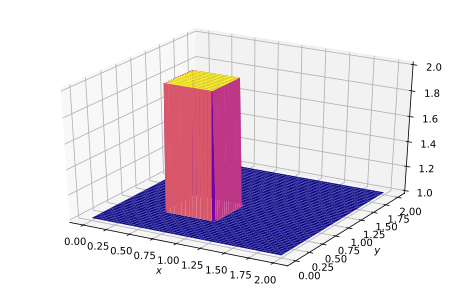

In [121]:
from mpl_toolkits.mplot3d import Axes3D

X, Y = np.meshgrid(xi, yi)

fig = plt.figure(figsize=(8, 5), dpi=100)
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, u_init, cmap='plasma', rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

In [122]:
u_alt = u_init.copy()  # wir übernehmen zunächst einmal die Anfangsbedingung
v_alt = v_init.copy()
u_neu = u_alt.copy()
v_neu = v_alt.copy()
t = 0                  # der Anfangszeitpunkt ist 0

while t < t_end:      # Schleife, solange bis Endzeitpunkt erreicht ist
    u_neu[1:, 1:] = (u_alt[1:, 1:] - 
                 (u_alt[1:, 1:] * dt / dx * (u_alt[1:, 1:] - u_alt[1:, :-1])) -
                  v_alt[1:, 1:] * dt / dy * (u_alt[1:, 1:] - u_alt[:-1, 1:]))
    v_neu[1:, 1:] = (v_alt[1:, 1:] -
                 (u_alt[1:, 1:] * dt / dx * (v_alt[1:, 1:] - v_alt[1:, :-1])) -
                 v_alt[1:, 1:] * dt / dy * (v_alt[1:, 1:] - v_alt[:-1, 1:]))
    #Einströmrandbedingung
    u_neu[0, :] = 1
    u_neu[:, 0] = 1
    v_neu[0, :] = 1
    v_neu[:, 0] = 1
    
    u_alt = u_neu.copy()
    v_alt = v_neu.copy()
    t += dt

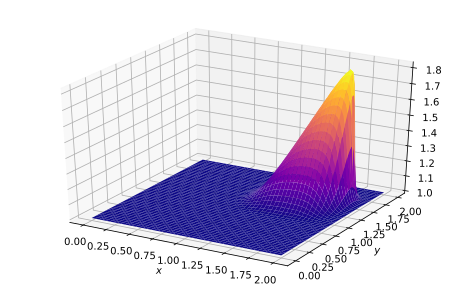

In [123]:
fig = plt.figure(figsize=(8, 5), dpi=100)
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, u_neu, cmap='plasma', rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

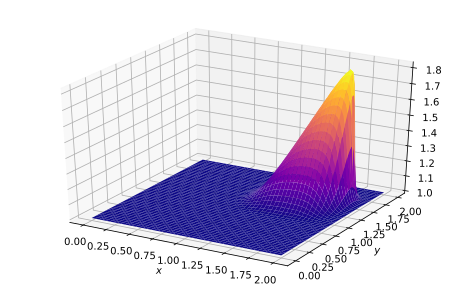

In [124]:
fig = plt.figure(figsize=(8, 5), dpi=100)
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, v_neu, cmap='plasma', rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

Damit haben wir die Konvektionsterme diskretisiert und können damit bereits (fast) Strömungen ohne Reibung berechnen. Wir wissen jetzt auch, wie man ganz allgemein nichtlineare Differentialgleichungssysteme 1. Ordnung lösen kann.

Was noch fehlt sind die Diffusionsterme, mit denen die Reibung berücksichtigt wird. Mit diesen kommen im [nächsten Notebook](TFD - 3.6 Kontinuumsstroemungen - Diffusion.ipynb) die Terme 2. Ordnung (2. Ableitungen) ins Spiel.


---
Dieses Notebook folgt einer Idee von Lorena A. Barba und deren exzellenter Ausarbeitung in Python (["12 Steps to Navier Stokes"](http://lorenabarba.com/blog/cfd-python-12-steps-to-navier-stokes/)).

Der folgende Python-Code darf ignoriert werden. Er dient nur dazu, die richtige Formatvorlage für die Jupyter-Notebooks zu laden.

In [4]:
from IPython.core.display import HTML
def css_styling():
    styles = open('TFDStyle.css', 'r').read()
    return HTML(styles)
css_styling()